# Figure 3a, 3b and S1
### (The data loded in this code is prodeced by file: Fast_migration_Invasion_exp.ipynb)

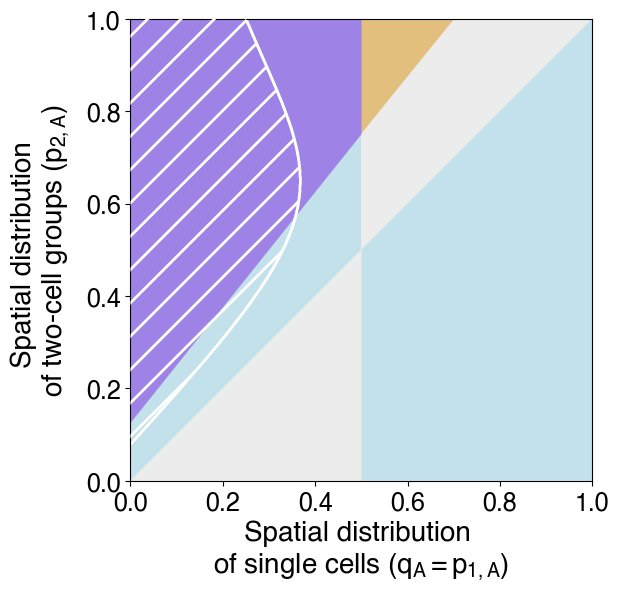

In [ ]:
#Packages and functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.colors import ListedColormap
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

pl.rcParams.update({
    "font.family": "Helvetica",
    "mathtext.fontset": "custom",
    "mathtext.rm": "Helvetica",
    "mathtext.it": "Helvetica:italic",
    "mathtext.bf": "Helvetica:bold",
    "axes.labelsize": 20,   # axis label size
    "xtick.labelsize": 18,  # tick label size
    "ytick.labelsize": 18,
})
# --- plot ---
pl.rcParams['hatch.linewidth'] = 2
pl.rcParams['hatch.color'] = 'white'

def f(qA,tau,sigma):
    return (1/tau)*qA + (sigma/(1-sigma))*(1/tau -1) 

def g(p2A,tau,sigma):
    return tau*p2A - tau*(sigma/(1-sigma))*(1/tau -1) 

def h(x,tau,sigma): #Multicellularity evolves
    return (((1-x)/(x**2 + (1-x)**2)) -(tau*sigma)/(x*(1-sigma) +sigma))/(tau*(1-sigma)/(x*(1-sigma) +sigma) -((2*x -1)/(x**2 +(1-x)**2)))

#--------------------#

#Parameters:

#This parameter can be changed:
tau=0.8   #cost of group formation, r2=tau*r1; Values simulated = 0.8, 0.94, 0.98

#This parameter is fixed:
sigma=1/3  #reduction in growth rate for environment B, rB=sigma*rA 

#Growth rates:
r1A=15 #fixed
r2A=tau*r1A
r1B=sigma*r1A
r2B=sigma*r2A

# Plotting parameters for multicellularity boundary (only for visualization)
xc1_d={0.8:0.615,0.94:0.69,0.98:0.72}
xc2_d={0.8:0.7,0.94:0.75,0.98:0.75}
xc1=xc1_d[tau]
xc2=xc2_d[tau]

#--------------------#

# Load data file
ecoO_file = f"Data/Figure 3 and S1/Fast_migration_Invasion_tau{tau}.csv"
Eco_O = pd.read_csv(ecoO_file, index_col=0).to_numpy()
Eco_O = Eco_O.T

#---------------------#

#Figure
points = np.linspace(0,1,1000)
qA_grid, p2A_grid = np.meshgrid(points, points, indexing='xy')


fig, ax = pl.subplots(figsize=(6,6))

x4=np.linspace(0,1,10000)
ax.fill_between(x4,x4*0 -1,x4*0+2,lw=0,color='#ecececff',zorder=0)
  
ax.fill("j", "k", '#c3e1eaff',alpha=1,  #Escaping competition only region 1
         data={"j": [0, 0,  0.5,0.5], 
               "k": [0, 1, 1,0.5]})  

ax.fill("j", "k", '#c3e1eaff',alpha=1,  #Escaping competition only region 2
         data={"j": [1, 0.5,0.5,1], 
               "k": [0,   0,0.5,1]}) 

ax.fill("j", "k", '#e3bf7eff',alpha=1,                      #Environmental exploitation only
         data={"j": [0.5             ,0.5, g(1,tau,sigma)], 
               "k": [f(0.5,tau,sigma),1  , 1             ]})

ax.fill("j", "k", '#9f82e6ff',alpha=1,                       #Both
         data={"j": [0, 0             ,0.5             ,0.5], 
               "k": [1, f(0,tau,sigma),f(0.5,tau,sigma),1]})  



# Multicellularity Invades boundary (Figure 3a)
#Comment to hide this region
#x1=np.linspace(0,xc1,10000)
#ax.fill_between(x1,x1*0 +1,h(x1,tau,sigma),color="none", edgecolor='white',hatch='\\',alpha=1,linewidth=3.,zorder=2)
#x2=np.linspace(xc2,1,10000)
#ax.fill_between(x2,x2*0 -1,h(x2,tau,sigma),color="none", edgecolor='white',hatch='\\',alpha=1,linewidth=3.,zorder=2)

# Multicellularity dominates boundary (Figure 3b)
#Comment to hide this region
dominance_mask = np.ma.masked_not_equal(Eco_O, 2)
ax.contourf(qA_grid, p2A_grid, dominance_mask,levels=[1.5, 2.5], colors='none', hatches=['/'], linewidths=0, zorder=10)
ax.contour(qA_grid, p2A_grid, Eco_O, levels=[1.5], hatches=['/'],colors='white',linewidths=2)

ax.set_aspect(1)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

# Labels and style
ax.set_aspect(1)
ax.set_xlabel('Spatial distribution \nof single cells $(q_A =p_{1,A})$')
ax.set_ylabel('Spatial distribution \nof two-cell groups $(p_{2,A})$', rotation=90, labelpad=10)
for tick in ax.get_xticklabels() + ax.get_yticklabels():
    tick.set_fontname("Helvetica")

pl.show()